In [7]:
__author__ = 'fengchen'

from cvxopt import matrix, solvers, spmatrix
import numpy as np
import matplotlib.pyplot as plt
from math import *

def calc_Q_p_G_h(data):
#     Q = spmatrix(2.0, range(3), range(3))
    Q = matrix([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], (3,3))
    Q[0,0] = 2
    Q[1,1] = 2
    p = matrix([0.0, 0.0, 0.0], (3,1))
    G = []
    h = []
    for items in data:
        row = []
        if items[2] == 1:
            row.extend([-1 * item for item in items[:2]])
            row.append(-1)
            G.append(row)
            h.append(-1.0)
        else:
            row.extend(items[:2])
            row.append(1)
            G.append(row)
            h.append(-1.0)
    #print G
    G = matrix(G).trans()
    h = matrix(h)
    print(Q, p)
    print(G, h)
    print(type(G))
    return Q, p, G, h
    
    
def plot(data, w1, w2, b, sol):
    ### suppose you have obtained sol['x'] from CVXOPT QP minimization

    x = [item[0] for item in data if item[2] == 1]
    y = [item[1] for item in data if item[2] == 1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='r')
    x = [item[0] for item in data if item[2] == -1]
    y = [item[1] for item in data if item[2] == -1]
    plt.scatter(x, y, s=80, facecolors='none', edgecolors='b')
    x = [item[0] for item in data]
    y = [item[1] for item in data]
    plt.scatter(x, y, s=40, facecolors='none', edgecolors='k')
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]

    print('w: {0}; b: {1} \n'.format([w1,w2], b))

    print('w.x + b > 0 for positive class')
    print('w.x + b < 0 for negative class') 

    x = [-1, 6]

    y = [(w1 * x[i] + b)/(-1 * w2) for i in range(2)]

    
    plt.plot(x, y, color='red')

    y = [(w1 * x[i] + b - 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')

    y = [(w1 * x[i] + b + 1)/(-1 * w2) for i in range(2)]

    plt.plot(x, y, color='black')
    
    plt.gca().set_aspect('equal', adjustable='box')

    plt.grid()

    plt.gcf().set_size_inches(5, 5)

    plt.show()


def svm_proc(data):
    Q, p, G, h = calc_Q_p_G_h(data)
    sol=solvers.qp(Q, p, G, h)
    w1 = sol['x'][0]
    w2 = sol['x'][1]
    b  = sol['x'][2]
    print('\n\nw1= {0}; w2={1}; b={2}'.format(w1, w2, b))
    plot(data, w1, w2, b, sol)


[ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[-5.00e-01 -1.00e+00 -1.00e+00]
[-1.00e+00 -5.00e-01 -1.00e+00]
[ 2.00e+00  2.00e+00  1.00e+00]
 [-1.00e+00]
[-1.00e+00]
[-1.00e+00]

<class 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0:  3.3319e-01  9.7293e-01  2e+00  2e+00  6e-16
 1:  7.1732e-01  1.1991e+00  2e-02  3e-01  2e-16
 2:  1.2831e+00  1.2800e+00  3e-03  1e-16  5e-14
 3:  1.2800e+00  1.2800e+00  3e-05  1e-16  2e-15
 4:  1.2800e+00  1.2800e+00  3e-07  3e-16  1e-15
Optimal solution found.


w1= -0.8000000954977434; w2=-0.8000000954977432; b=2.200000279372788
w: [-0.8000000954977434, -0.8000000954977432]; b: 2.200000279372788 

w.x + b > 0 for positive class
w.x + b < 0 for negative class


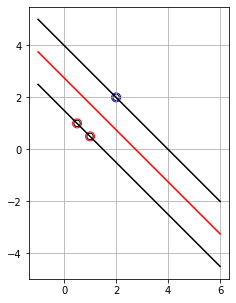

In [ ]:
data = [[0.5,1,1], [1,0.5,1], [2,2,-1]]
svm_proc(data)

[ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[-5.00e-01 -1.00e+00 -1.00e+00]
[-1.00e+00 -1.00e+00 -1.00e+00]
[ 2.00e+00  2.00e+00  1.00e+00]
 [-1.00e+00]
[-1.00e+00]
[-1.00e+00]

<class 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0:  3.1865e-01  1.1437e+00  2e+00  2e+00  6e-16
 1:  7.3137e-01  1.5280e+00  2e-01  4e-01  3e-16
 2:  1.9734e+00  1.9984e+00  1e-01  4e-02  3e-14
 3:  1.9997e+00  2.0000e+00  1e-03  4e-04  2e-15
 4:  2.0000e+00  2.0000e+00  1e-05  4e-06  2e-15
 5:  2.0000e+00  2.0000e+00  1e-07  4e-08  3e-15
Optimal solution found.


w1= -0.9999999926367941; w2=-0.9999999916426239; b=2.9999999726858544
w: [-0.9999999926367941, -0.9999999916426239]; b: 2.9999999726858544 

w.x + b > 0 for positive class
w.x + b < 0 for negative class


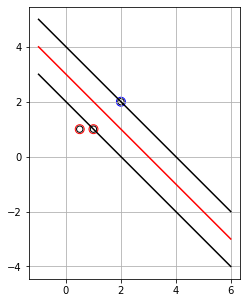

In [ ]:
data = [[0.5,1,1], [1,1,1], [2,2,-1]]
svm_proc(data)

[ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[-5.00e+00 -3.00e+00 -1.00e+00]
[-6.00e+00 -1.00e+00 -1.00e+00]
[ 1.00e+00  2.00e+00  1.00e+00]
[ 3.00e+00  1.00e+00  1.00e+00]
 [-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

<class 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0:  2.3172e-01  1.4858e+00  7e+00  2e+00  8e+00
 1:  1.1909e+00  4.0539e-01  8e-01  4e-16  1e-14
 2:  6.0696e-01  5.4828e-01  6e-02  4e-16  6e-15
 3:  5.5624e-01  5.5542e-01  8e-04  3e-16  2e-15
 4:  5.5556e-01  5.5555e-01  8e-06  2e-16  3e-15
 5:  5.5556e-01  5.5556e-01  8e-08  2e-16  5e-15
Optimal solution found.


w1= 0.6666667267107993; w2=0.33333331547659695; b=-3.3333335297147606
w: [0.6666667267107993, 0.33333331547659695]; b: -3.3333335297147606 

w.x + b > 0 for positive class
w.x + b < 0 for negative class


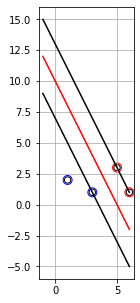

In [ ]:
data = [[5.0,3.0,1], [6.0,1.0,1], [1.0,2.0,-1], [3.0, 1.0, -1]]
svm_proc(data)

[ 2.00e+00  0.00e+00  0.00e+00]
[ 0.00e+00  2.00e+00  0.00e+00]
[ 0.00e+00  0.00e+00  0.00e+00]
 [ 0.00e+00]
[ 0.00e+00]
[ 0.00e+00]

[-4.00e+00 -3.00e+00 -1.00e+00]
[-5.00e+00 -2.00e+00 -1.00e+00]
[ 1.00e+00  2.00e+00  1.00e+00]
[ 3.00e+00  1.00e+00  1.00e+00]
 [-1.00e+00]
[-1.00e+00]
[-1.00e+00]
[-1.00e+00]

<class 'cvxopt.base.matrix'>
     pcost       dcost       gap    pres   dres
 0:  3.3801e-01  7.3342e-01  1e+00  1e+00  2e-15
 1:  5.9131e-01  8.4389e-01  4e-02  2e-01  7e-16
 2:  8.8373e-01  8.8873e-01  3e-03  5e-03  3e-14
 3:  8.8884e-01  8.8889e-01  3e-05  5e-05  2e-15
 4:  8.8889e-01  8.8889e-01  3e-07  5e-07  4e-15
 5:  8.8889e-01  8.8889e-01  3e-09  5e-09  3e-15
Optimal solution found.


w1= 0.6666666658975391; w2=0.6666666635704114; b=-3.6666666575609805
w: [0.6666666658975391, 0.6666666635704114]; b: -3.6666666575609805 

w.x + b > 0 for positive class
w.x + b < 0 for negative class


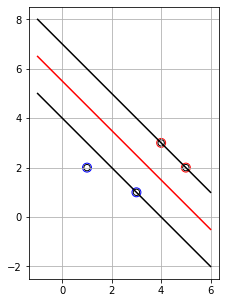

In [ ]:
data = [[4.0,3.0,1], [5.0,2.0,1], [1.0,2.0,-1], [3.0, 1.0, -1]]
svm_proc(data)